In [1]:
import numpy as np

from empiricaldist import Pmf

In [2]:
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

In [3]:
def update_train(pmf, data):
    """Update the PMF with new data."""
    hypos = pmf.qs
    likelihood = 1/hypos
    impossible = hypos < data
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [4]:
data = 60
posterior = prior.copy()
update_train(posterior, data)

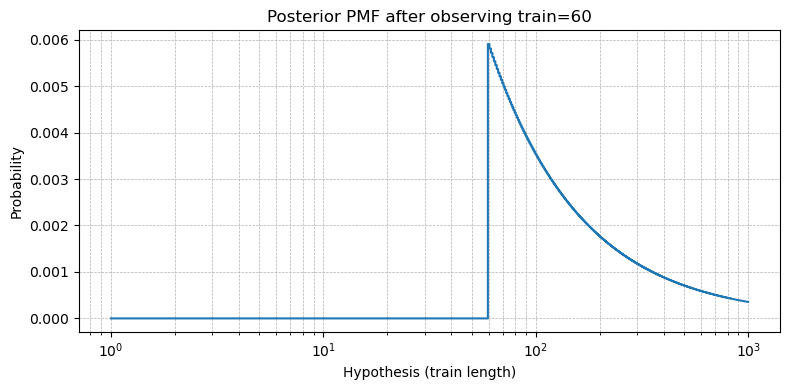

In [5]:
# Plot the posterior PMF
import matplotlib.pyplot as plt

# posterior is a Pmf from earlier cells; data holds the observed value
xs = posterior.qs
ps = posterior.ps

plt.figure(figsize=(8,4))
plt.plot(xs, ps, drawstyle="steps-mid")
plt.xlabel('Hypothesis (train length)')
plt.ylabel('Probability')
plt.title(f'Posterior PMF after observing train={data}')
plt.xscale('log')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()

In [6]:
np.sum(posterior.ps * posterior.qs)

np.float64(333.41989326370776)

In [7]:
posterior.mean()

np.float64(333.41989326370776)